In [314]:
import pandas as pd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.covariance import LedoitWolf, EmpiricalCovariance, ShrunkCovariance, OAS, GraphLassoCV, MinCovDet, GraphLasso
%matplotlib inline

In [7]:
DATA_DIR = 'D:Data/stocks/'

# 读取成分股

In [111]:
index = pd.read_excel('D:Data/index-component/000300.xlsx')

In [112]:
index.head()

,code,name
0,000001.SZ,平安银行
1,000002.SZ,万科A
2,000008.SZ,神州高铁
3,000009.SZ,中国宝安
4,000027.SZ,深圳能源


# 读取股票历史数据

In [113]:
dic = {}
for code in index['code']:
    fname = '%s/%s.xlsx'%(DATA_DIR, code)
    df = pd.read_excel(fname, index_col=0)
    dic[code] = df[['close']]
pnl = pd.Panel(dic)

In [114]:
pnl

<class 'pandas.core.panel.Panel'>
Dimensions: 300 (items) x 957 (major_axis) x 1 (minor_axis)
Items axis: 000001.SZ to 603993.SH
Major_axis axis: 2013-07-01 00:00:00.005000 to 2017-06-02 00:00:00.005000
Minor_axis axis: close to close

# 计算收益率

In [115]:
pnl.ix[:, :, 'return'] = pnl.minor_xs('close').pct_change()

In [116]:
df = pnl.minor_xs('return')

In [315]:
df.tail()

,000001.SZ,000002.SZ,000008.SZ,000009.SZ,000027.SZ,000039.SZ,000060.SZ,000061.SZ,000063.SZ,000069.SZ,...,601933.SH,601939.SH,601958.SH,601985.SH,601988.SH,601989.SH,601998.SH,603000.SH,603885.SH,603993.SH
2017-05-25 00:00:00.005,0.032917,0.068265,0.028653,0.011019,0.010606,0.011342,0.029897,-0.002260,0.049526,0.042553,...,-0.010145,0.014540,0.022727,0.012000,0.010929,0.018212,0.035058,0.012928,0.027418,0.000000
2017-05-26 00:00:00.005,0.000000,0.002439,-0.004178,-0.002725,-0.004498,0.012461,-0.007007,0.002265,-0.027108,-0.007937,...,-0.036603,0.014331,-0.001481,0.005270,0.000000,0.009756,-0.003226,0.000000,0.047550,-0.013986
2017-05-31 00:00:00.005,0.010989,0.034550,-0.008392,0.004098,0.003012,-0.018462,-0.005040,0.010169,0.007740,0.008000,...,0.000000,0.000000,0.000000,0.011796,0.008108,0.000000,0.001618,-0.003754,0.005095,-0.004728
2017-06-01 00:00:00.005,-0.001087,-0.007996,-0.012694,-0.012245,-0.024024,-0.004389,-0.023303,-0.029083,0.001024,0.000000,...,0.018237,0.006279,-0.014837,0.010363,0.002681,0.000000,0.000000,-0.036172,0.013825,-0.033254
2017-06-02 00:00:00.005,-0.002176,-0.006638,0.015714,0.009642,0.023077,0.013854,0.014523,0.004608,0.010230,-0.010204,...,0.005970,-0.009360,0.022590,-0.002564,-0.005348,0.000000,-0.012924,0.010164,-0.005909,-0.007371


# 训练、测试数据

In [316]:
X_train = df[df.index < '2017-01-01']
X_test = df[df.index >= '2017-01-01']

In [317]:
X_train.fillna(0, inplace=True)

In [165]:
X_train.dropna(inplace=True)

In [318]:
def evaluate(err):
    print 'F norm =', LA.norm(err, 'fro')
    print 'L1 norm =', LA.norm(err, 1)
    print 'L2 norm =', LA.norm(err, 2)

# sample covariance estimation

In [319]:
err = X_train.cov().as_matrix() - X_test.cov().as_matrix()

In [320]:
evaluate(err)

F norm = 0.0975550370062
L1 norm = 0.136365391473
L2 norm = 0.0947436244619


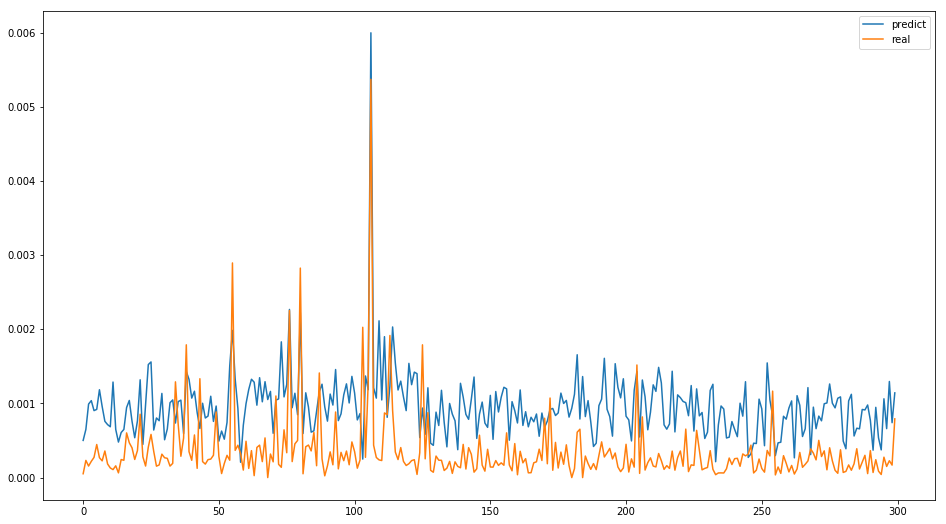

In [348]:
plt.figure(figsize=(16, 9))
plt.plot(np.diag(X_train.cov()), label='predict')
plt.plot(np.diag(X_test.cov()), label='real')
plt.legend()

# Ledoit-Wolf shrinkage

In [336]:
lw = LedoitWolf()

In [337]:
lw.fit(X_train)

LedoitWolf(assume_centered=False, block_size=1000, store_precision=True)

In [338]:
err = lw.covariance_ - X_test.cov().as_matrix()

In [339]:
evaluate(err)

F norm = 0.0948508902457
L1 norm = 0.132569510501
L2 norm = 0.0920468068874


In [340]:
lw.error_norm(X_test.cov().as_matrix())

2.9988971268000223e-05

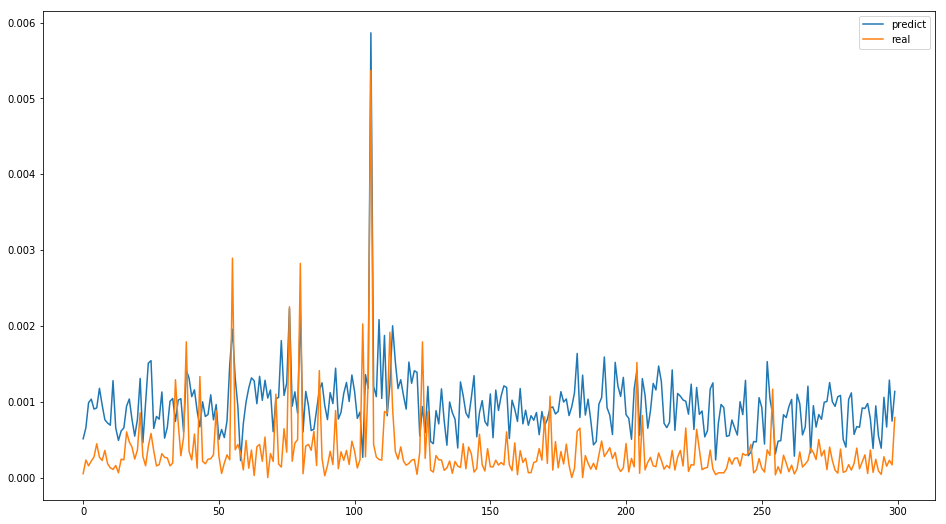

In [352]:
plt.figure(figsize=(16, 9))
plt.plot(np.diag(lw.covariance_), label='predict')
plt.plot(np.diag(X_test.cov()), label='real')
plt.legend()

# Empirical Covariance

In [322]:
ec = EmpiricalCovariance()

In [323]:
ec.fit(X_train)

EmpiricalCovariance(assume_centered=False, store_precision=True)

In [324]:
err = ec.covariance_ - X_test.cov().as_matrix()

In [325]:
evaluate(err)

F norm = 0.097430453619
L1 norm = 0.136192321259
L2 norm = 0.0946203418755


In [326]:
ec.error_norm(X_test.cov().as_matrix())

3.1642310974651431e-05

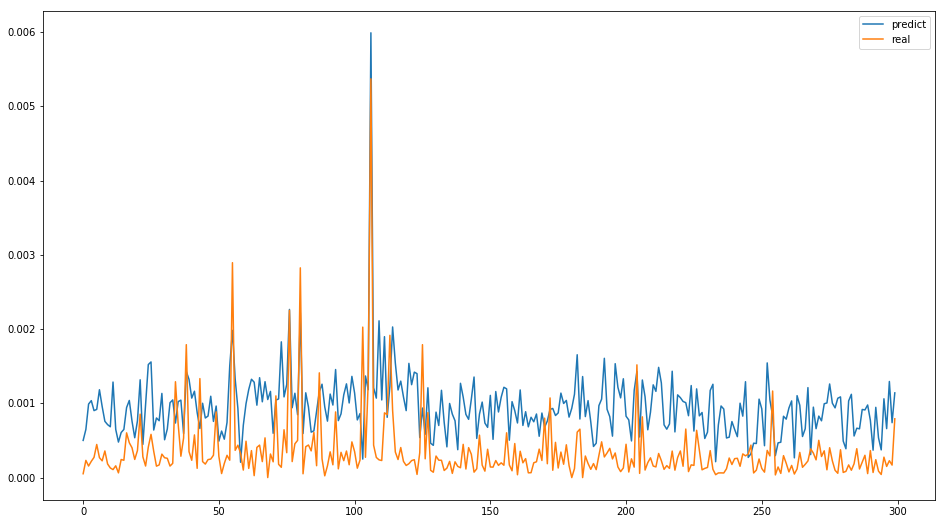

In [346]:
plt.figure(figsize=(16, 9))
plt.plot(np.diag(ec.covariance_), label='predict')
plt.plot(np.diag(X_test.cov()), label='real')
plt.legend()

# Shrunk Covariance

In [353]:
sc = ShrunkCovariance(shrinkage=0.5)

In [354]:
sc.fit(X_train)

ShrunkCovariance(assume_centered=False, shrinkage=0.5, store_precision=True)

In [355]:
err = sc.covariance_ - X_test.cov().as_matrix()

In [356]:
evaluate(err)

F norm = 0.0464277121027
L1 norm = 0.0626307879524
L2 norm = 0.0425544284273


In [357]:
sc.error_norm(X_test.cov().as_matrix())

7.1851081703058617e-06

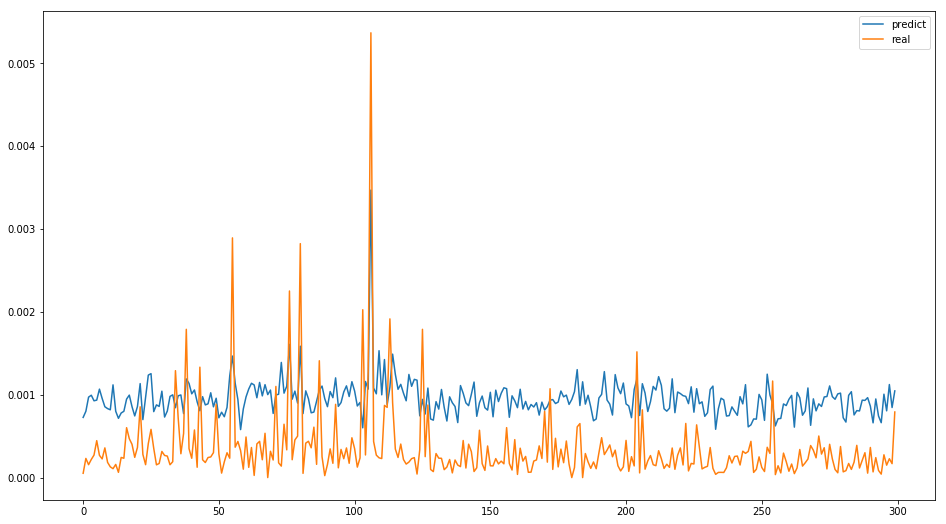

In [359]:
plt.figure(figsize=(16, 9))
plt.plot(np.diag(sc.covariance_), label='predict')
plt.plot(np.diag(X_test.cov()), label='real')
plt.legend()

# Oracle Approximating Shrinkage

In [361]:
oas = OAS()

In [362]:
oas.fit(X_train)

OAS(assume_centered=False, store_precision=True)

In [363]:
err = oas.covariance_ - X_test.cov().as_matrix()

In [364]:
evaluate(err)

F norm = 0.0964437479297
L1 norm = 0.134807148809
L2 norm = 0.0936362759107


In [365]:
oas.error_norm(X_test.cov().as_matrix())

3.1004655049061343e-05

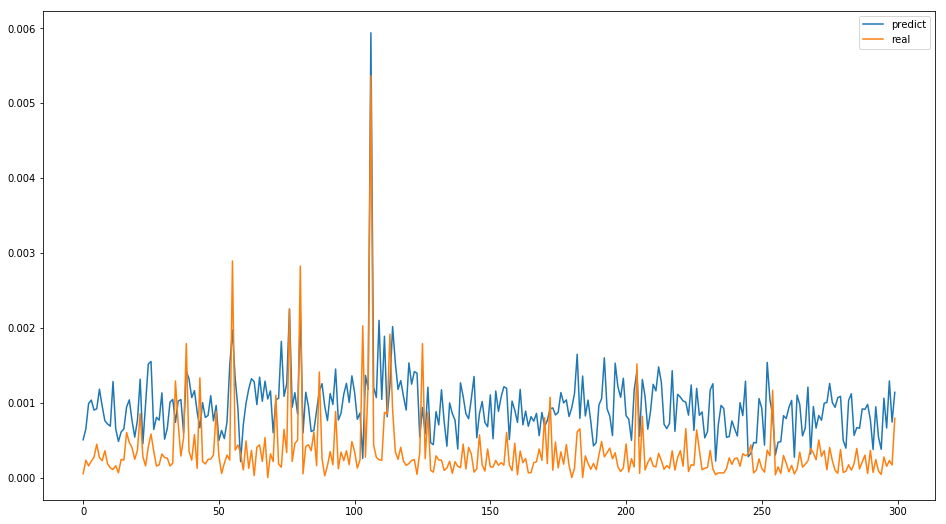

In [366]:
plt.figure(figsize=(16, 9))
plt.plot(np.diag(oas.covariance_), label='predict')
plt.plot(np.diag(X_test.cov()), label='real')
plt.legend()

# Robust Covariance Estimation

In [367]:
mcd = MinCovDet()

In [371]:
mcd.fit(X_train)

ValueError: Singular covariance matrix. Please check that the covariance matrix corresponding to the dataset is full rank and that MinCovDet is used with Gaussian-distributed data (or at least data drawn from a unimodal, symmetric distribution.

In [193]:
err = mcd.covariance_ - X_test.cov().as_matrix()

In [194]:
evaluate(err)

F norm = 0.0231807223562
L1 norm = 0.0440782287612
L2 norm = 0.0150733969712


In [195]:
mcd.error_norm(X_test.cov().as_matrix())

1.7911529631769605e-06

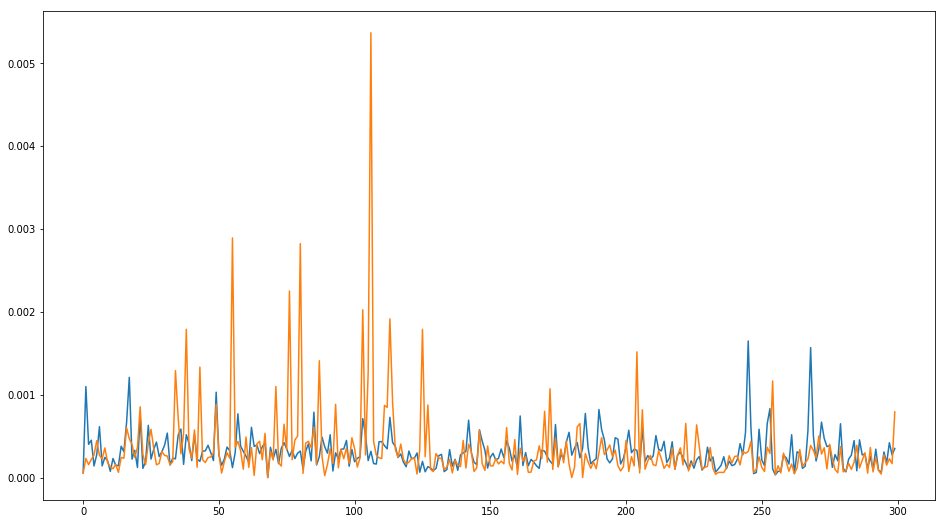

In [196]:
plt.figure(figsize=(16, 9))
plt.plot(np.diag(mcd.covariance_))
plt.plot(np.diag(X_test.cov()))